# Lab Program 4 | k Nearest Neighbours

- Load a dataset suitable for classification (e.g., Iris dataset).
- Implement the k-NN algorithm and classify the data points.
- Experiment with different values of k and visualize the decision boundaries.

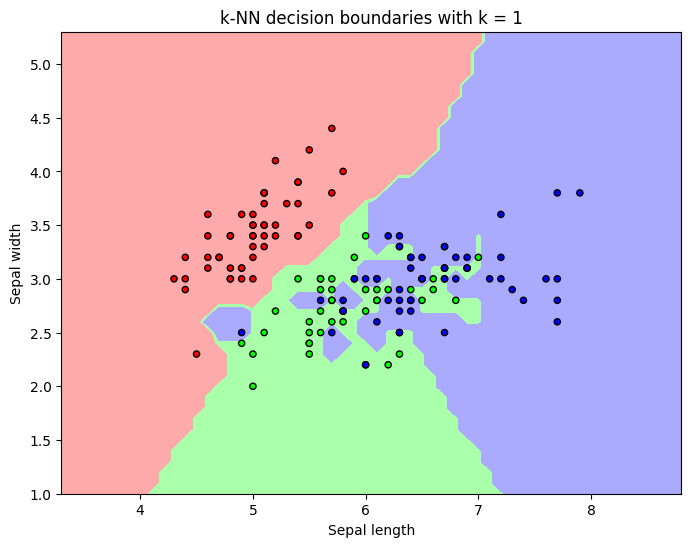

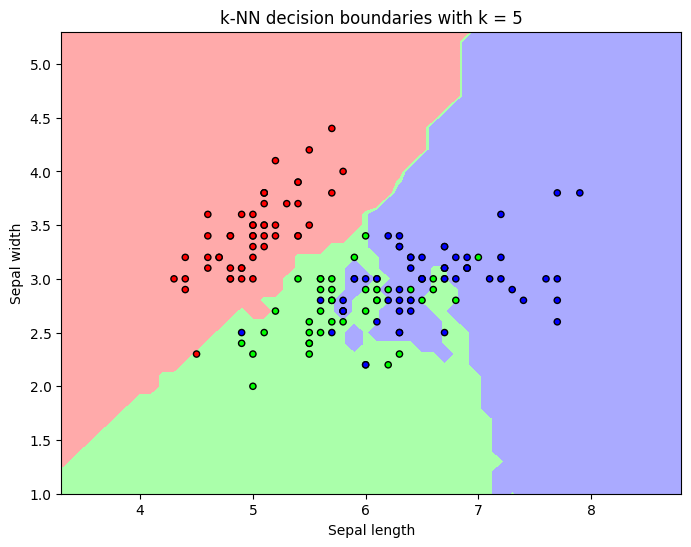

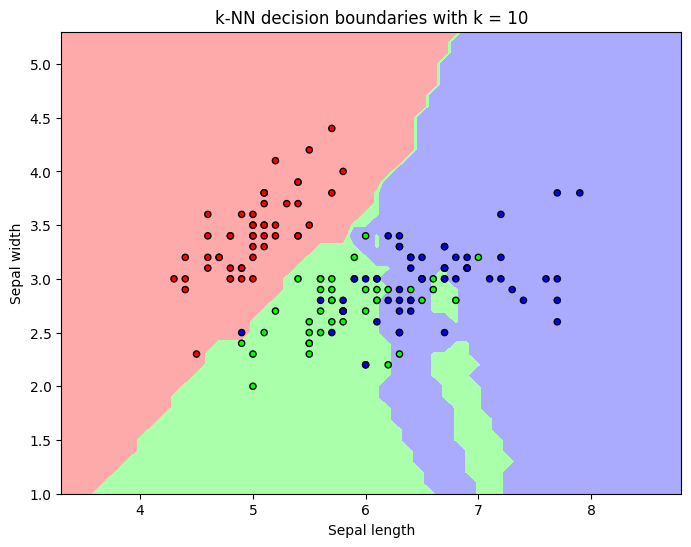

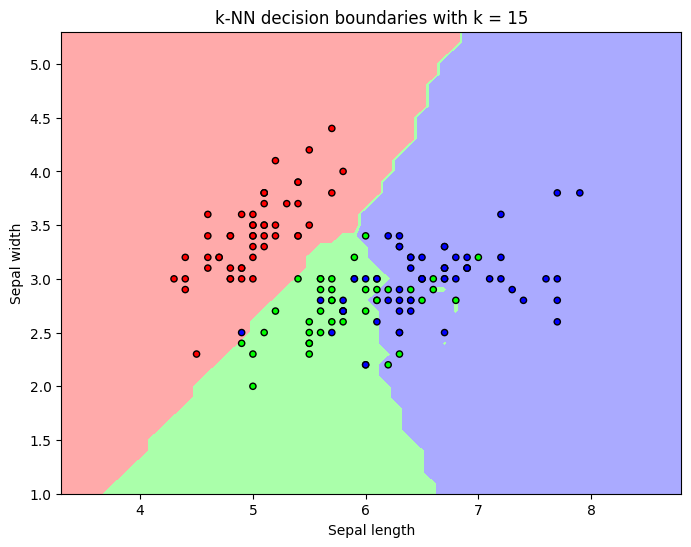

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset and select only the first two features for easy visualization
iris = load_iris()
X = iris.data[:, :2]  # Using only sepal length and sepal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to plot the decision boundaries
def plot_decision_boundaries(X, y, k):
    # Set up color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Create a mesh grid for plotting boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and scatter plot of data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"k-NN decision boundaries with k = {k}")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

# Plot decision boundaries for different values of k
for k in [1, 5, 10, 15]:
    plot_decision_boundaries(X, y, k)
